# **Universidade Tiradentes**

Pós-Graduação em Ciência de Dados e Inteligência Artificial- Turma 2024/001

Disciplina: Linguagens Python e R com Foco em Análise de Dados

Aluno(s): Cleiton Alves Fraga, Rodolfo Brandão

**Instruções gerais**  
- Use este notebook como **template** para responder às questões.  
- Você poderá utilizar apenas **pandas**, **numpy** e **matplotlib**.  
- Comente seu código e **justifique** suas respostas numéricas com frases curtas.  
- O banco de dados é o **microdados ENEM (Nordeste)** previamente disponibilizado.  

 **Checklist mínimo por questão**
- Código funcional, com comentários.  
- Tabelas/estatísticas corretas.  
- Gráficos legíveis (títulos, rótulos).  
- Resposta textual objetiva ao final de cada questão.

  **Rubrica de Avaliação**

- Correção técnica (40%) – código funcional e resultados corretos.
- Clareza e organização (20%) – código comentado e estruturado.
- Visualização (20%) – gráficos claros, bem rotulados e interpretados.
- Análise crítica (20%) – justificativas e interpretações consistentes.

# **1. Crie uma função chamada `filtrar_colunas_enem(df)` que:**
   - receba como entrada o DataFrame dos microdados do ENEM,  
   - retorne apenas as colunas **essenciais para análise de notas e informações básicas**,  
   - **exclua** as colunas referentes ao questionário socioeconômico (`Q001` a `Q025`).  

In [ ]:
import pandas as pd

path = '/Users/cleitonfraga/Documents/ciencia de dados/R/microdados_enem_nordeste.csv'
enem_df = pd.read_csv(path, sep=';', encoding='utf-8', encoding_errors='ignore')

def filtrar_colunas_enem(df):
    # Seleciona colunas essenciais, excluindo as do questionário socioeconômico
    colunas_essenciais = [col for col in df.columns if not col.startswith('Q') and col not in ['NU_INSCRICAO', 'TP_PRESENCA']]
    return df[colunas_essenciais]

enem_essencial = filtrar_colunas_enem(enem_df)
enem_essencial.head()

,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,...,NU_NOTA_LC,NU_NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO
0,2023,17 anos,Feminino,Solteiro(a),Parda,Brasileiro(a),Estou cursando e concluirei o Ensino Médio em ...,Não informado,Pública,Ensino Regular,...,"507,2","466,7",Ingles,Sem problemas,140.0,200.0,160.0,180.0,200.0,880.0
1,2023,18 anos,Feminino,Solteiro(a),Parda,Brasileiro(a),Estou cursando e concluirei o Ensino Médio em ...,Não informado,Pública,Ensino Regular,...,"446,9","338,3",Ingles,Sem problemas,120.0,120.0,120.0,120.0,80.0,560.0
2,2023,23 anos,Maculino,Solteiro(a),Parda,Brasileiro(a),Já concluí o Ensino Médio,2018,Não respondeu,NaN,...,"626,9","736,3",Ingles,Sem problemas,140.0,200.0,160.0,160.0,200.0,860.0
3,2023,22 anos,Feminino,Solteiro(a),Parda,Brasileiro(a),Já concluí o Ensino Médio,2019,Não respondeu,NaN,...,"388,5","415,6",Espanhol,Sem problemas,120.0,120.0,100.0,120.0,100.0,560.0
4,2023,19 anos,Feminino,Solteiro(a),Branca,Brasileiro(a),Estou cursando e concluirei o Ensino Médio em ...,Não informado,Pública,Ensino Regular,...,"544,4",437,Ingles,Sem problemas,160.0,180.0,160.0,180.0,200.0,880.0


#**Questão 2:**

a) Crie uma tabela com as médias das notas (NU_NOTA_CN, NU_NOTA_CH, NU_NOTA_LC, NU_NOTA_MT) por estado (SG_UF_PROVA).

b) Identifique quais estados tiveram menor e maior média em cada área.

c) Selecione candidatos com média geral > 900 e mostre o grau de escolaridade do pai (Q001), da mãe (Q002) e renda familiar (Q006).

d) Faça o mesmo para candidatos com média geral <

In [5]:
dados_filtrados_estado = enem_df[["SG_UF_PROVA", "NU_NOTA_LC", "NU_NOTA_CN", "NU_NOTA_CH", "NU_NOTA_MT"]].copy()

# removendo linhas com valores nulos
dados_filtrados_estado.dropna(inplace=True)
dados_filtrados_estado.head()

# calculando a média das notas por estado
for col in ["NU_NOTA_LC", "NU_NOTA_CN", "NU_NOTA_CH", "NU_NOTA_MT"]:
    dados_filtrados_estado[col] = dados_filtrados_estado[col].astype(str).str.replace(',', '.')
    dados_filtrados_estado[col] = pd.to_numeric(dados_filtrados_estado[col], errors='coerce')

media_por_estado = dados_filtrados_estado.groupby('SG_UF_PROVA')[["NU_NOTA_LC", "NU_NOTA_CN", "NU_NOTA_CH", "NU_NOTA_MT"]].mean()

# estado com maior e menor média em cada área
maior_menor_media = {}
for col in ["NU_NOTA_LC", "NU_NOTA_CN", "NU_NOTA_CH", "NU_NOTA_MT"]:
    maior_estado = media_por_estado[col].idxmax()
    menor_estado = media_por_estado[col].idxmin()
    maior_menor_media[col] = {'Maior': maior_estado, 'Menor': menor_estado}

display(maior_menor_media)


# candidatos com média geral > 900
enem_df["NU_NOTA_LC"] = pd.to_numeric(enem_df["NU_NOTA_LC"], errors='coerce')
enem_df["NU_NOTA_CN"] = pd.to_numeric(enem_df["NU_NOTA_CN"], errors='coerce')
enem_df["NU_NOTA_CH"] = pd.to_numeric(enem_df["NU_NOTA_CH"], errors='coerce')
enem_df["NU_NOTA_MT"] = pd.to_numeric(enem_df["NU_NOTA_MT"], errors='coerce')
enem_df["MEDIA_GERAL"] = enem_df[["NU_NOTA_LC", "NU_NOTA_CN", "NU_NOTA_CH", "NU_NOTA_MT"]].mean(axis=1)
candidatos_maior_900 = enem_df[enem_df["MEDIA_GERAL"] > 900][["Q001", "Q002", "Q006"]]
candidatos_menor_900 = enem_df[enem_df["MEDIA_GERAL"] < 900][["Q001", "Q002", "Q006"]]

display(candidatos_maior_900)
display(candidatos_menor_900)

{'NU_NOTA_LC': {'Maior': 'MA', 'Menor': 'RN'},
 'NU_NOTA_CN': {'Maior': 'SE', 'Menor': 'RN'},
 'NU_NOTA_CH': {'Maior': 'PA', 'Menor': 'RN'},
 'NU_NOTA_MT': {'Maior': 'CE', 'Menor': 'PI'}}

,Q001,Q002,Q006
6108,Nao completou a 4a serie/5o ano do ensino fund...,Nao completou a 4a serie/5o ano do ensino fund...,"Ate R$ 1.320,00"
12387,"Completou o Ensino Medio, mas nao completou a ...","Completou o Ensino Medio, mas nao completou a ...","Ate R$ 1.320,00"
13456,Completou a Pos-graduacao,"Completou a Faculdade, mas nao completou a Pos...","De R$ 19.800,01 ate R$ 26.400,00."
22611,"Completou a Faculdade, mas nao completou a Pos...","Completou a Faculdade, mas nao completou a Pos...","Acima de R$ 26.400,00."
68449,Completou a Pos-graduacao,Completou a Pos-graduacao,"De R$ 15.840,01 ate R$19.800,00."
...,...,...,...
891588,"Completou a Faculdade, mas nao completou a Pos...","Completou a Faculdade, mas nao completou a Pos...","De R$ 15.840,01 ate R$19.800,00."
903453,"Completou a Faculdade, mas nao completou a Pos...",Completou a Pos-graduacao,"De R$ 19.800,01 ate R$ 26.400,00."
906026,Completou a Pos-graduacao,Completou a Pos-graduacao,"De R$ 15.840,01 ate R$19.800,00."
933359,"Completou o Ensino Medio, mas nao completou a ...","Completou o Ensino Medio, mas nao completou a ...","De R$ 3.960,01 ate R$ 5.280,00."


,Q001,Q002,Q006
0,Completou a 8a serie/9o ano do ensino fundamen...,Completou a 8a serie/9o ano do ensino fundamen...,"De R$ 1.320,01 ate R$ 1.980,00."
4,"Completou o Ensino Medio, mas nao completou a ...","Completou o Ensino Medio, mas nao completou a ...","Ate R$ 1.320,00"
5,Nao completou a 4a serie/5o ano do ensino fund...,Nao completou a 4a serie/5o ano do ensino fund...,"Ate R$ 1.320,00"
7,Nao completou a 4a serie/5o ano do ensino fund...,"Completou a 4a serie/5o ano, mas nao completou...","Ate R$ 1.320,00"
8,"Completou o Ensino Medio, mas nao completou a ...","Completou o Ensino Medio, mas nao completou a ...","Ate R$ 1.320,00"
...,...,...,...
994026,Nao completou a 4a serie/5o ano do ensino fund...,Nao completou a 4a serie/5o ano do ensino fund...,"Ate R$ 1.320,00"
994027,Nao completou a 4a serie/5o ano do ensino fund...,Nao completou a 4a serie/5o ano do ensino fund...,"De R$ 1.320,01 ate R$ 1.980,00."
994030,Nao sei,"Completou o Ensino Medio, mas nao completou a ...",Nenhuma Renda
994031,"Completou o Ensino Medio, mas nao completou a ...","Completou o Ensino Medio, mas nao completou a ...","Ate R$ 1.320,00"


#**Questão 3. Calcule o desvio padrão das notas em cada área por estado e identifique, para cada estado, qual área teve maior variação. Apresente uma tabela com `Estado` e `Área_com_maior_variação`.**

In [4]:
# Calculando o desvio padrão das notas por estado
desvio_padrao_por_estado = dados_filtrados_estado.groupby('SG_UF_PROVA')[["NU_NOTA_LC", "NU_NOTA_CN", "NU_NOTA_CH", "NU_NOTA_MT"]].std()

# Identificando a área com maior variação para cada estado
area_maior_variacao = desvio_padrao_por_estado.idxmax(axis=1).reset_index()
area_maior_variacao.columns = ['Estado', 'Área_com_maior_variação']
display(area_maior_variacao)


,Estado,Área_com_maior_variação
0,AL,NU_NOTA_MT
1,BA,NU_NOTA_MT
2,CE,NU_NOTA_MT
3,MA,NU_NOTA_MT
4,PA,NU_NOTA_MT
5,PB,NU_NOTA_MT
6,PI,NU_NOTA_MT
7,RN,NU_NOTA_MT
8,SE,NU_NOTA_MT


# **Questão 4 – Visualização de dados**

a) Crie um boxplot das notas de `NU_NOTA_REDACAO` por estado (Nordeste).

b) Crie um histograma das notas de `NU_NOTA_MT` para uma UF específica.

Adicione título, rótulos e grade.

Escreva 2–3 frases de interpretação dos gráficos.

a) Crie um boxplot das notas de `NU_NOTA_REDACAO` por estado (Nordeste).

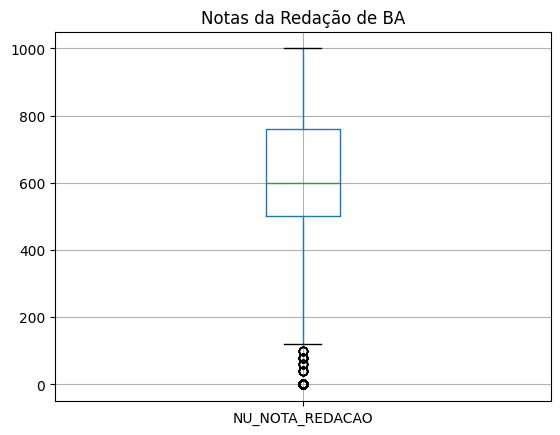

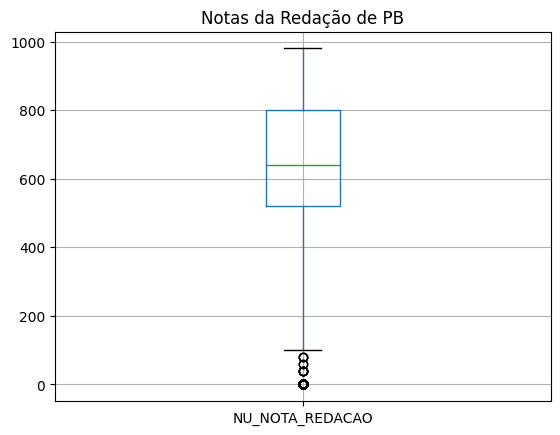

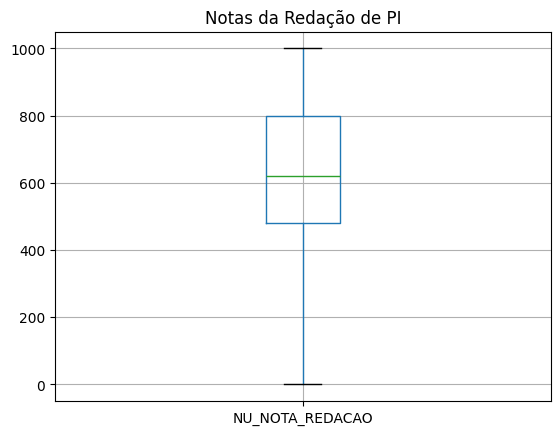

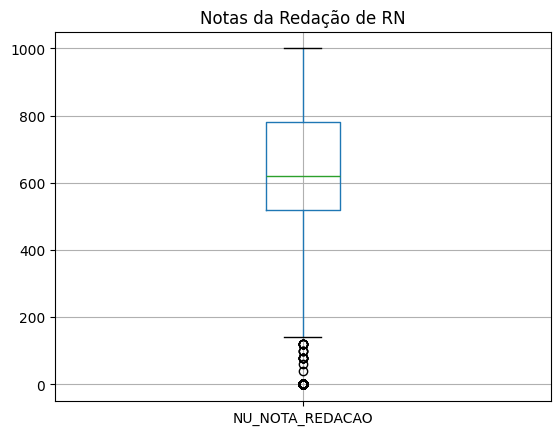

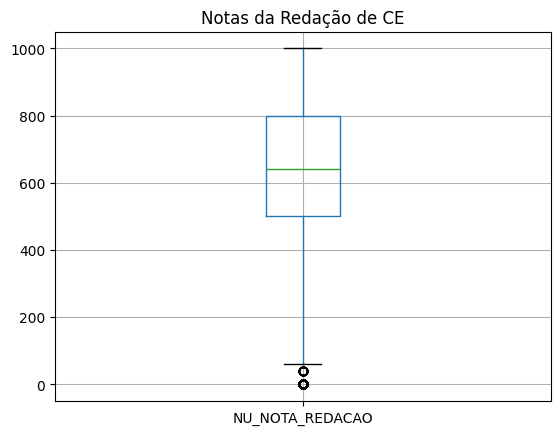

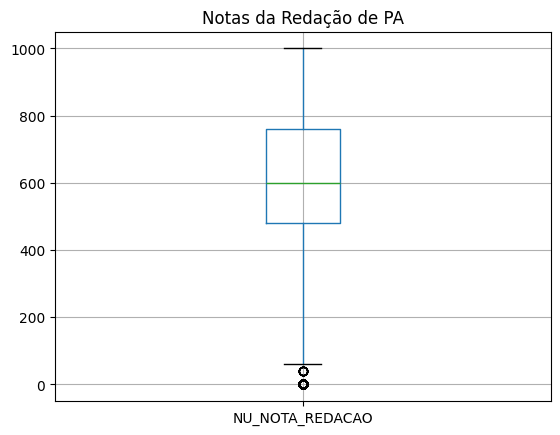

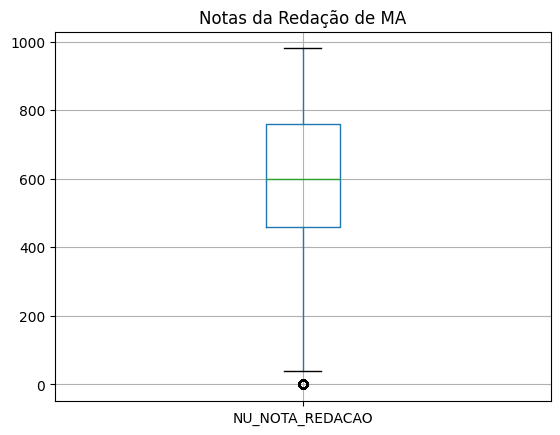

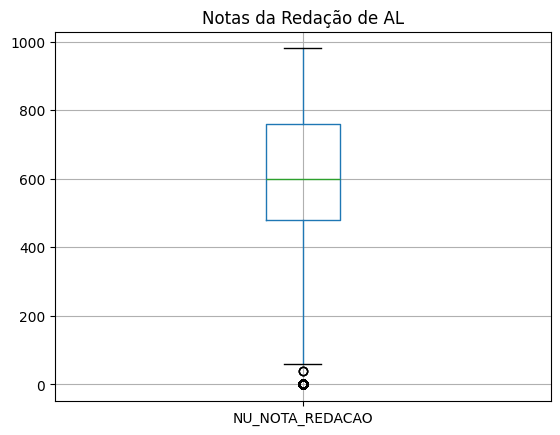

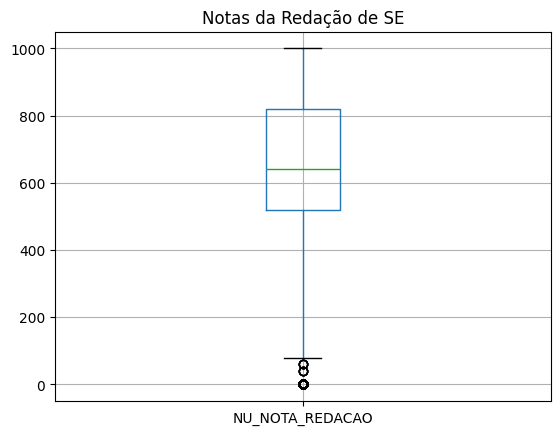

In [ ]:
import matplotlib.pyplot as plt

# Filtrar somente as colunas "SG_UF_PROVA", "NU_NOTA_REDACAO"
nota_redacao_por_estado_df = enem_df[["SG_UF_PROVA", "NU_NOTA_REDACAO"]]

# Separar num vetor as UFs (sem duplicatas, usando o método `set()` do Python):
siglas_estados_nordeste = set(nota_redacao_por_estado_df["SG_UF_PROVA"])

# Iterar por cada UF, filtar as notas da redação, criar e plotar o bloxplot:
for uf in siglas_estados_nordeste:
    notas_redacao = pd.DataFrame(
        nota_redacao_por_estado_df.loc[nota_redacao_por_estado_df["SG_UF_PROVA"] == uf, "NU_NOTA_REDACAO"]
    )
    notas_redacao.boxplot(column=["NU_NOTA_REDACAO"])
    plt.title (f"Notas da Redação de {uf}")
    plt.show()